In [1]:
import numpy as np
import seaborn as sns
from keras import models, layers, callbacks, optimizers
from scipy.io import loadmat
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
train_mat = loadmat('data/train_32x32.mat')
test_mat = loadmat('data/test_32x32.mat')

#Format into np array of float pixels and 1d array of ints for labels
train_imgs = np.array(train_mat['X']).astype('float64')
train_lbls = np.array(train_mat['y']).flatten()
test_imgs = np.array(test_mat['X']).astype('float64')
test_lbls = np.array(test_mat['y']).flatten()

#Normalize to 0..1
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

In [3]:
train_imgs = np.moveaxis(train_imgs, -1, 0)
test_imgs = np.moveaxis(test_imgs, -1, 0)

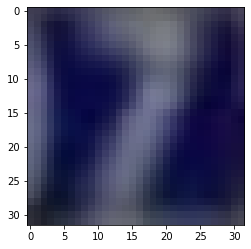

Label:  7


In [4]:
plt.imshow(train_imgs[2241])
plt.show()

print('Label: ', train_lbls[2241])

In [5]:
#Binarize labels
binarizer = LabelBinarizer()
train_lbls = binarizer.fit_transform(train_lbls)
test_lbls = binarizer.fit_transform(test_lbls)

In [6]:
X_trn, X_tst, y_trn, y_tst = train_test_split(train_imgs, train_lbls, test_size=0.2, random_state=0)
print(X_trn.shape, X_tst.shape, y_trn.shape, y_tst.shape)

(58605, 32, 32, 3) (14652, 32, 32, 3) (58605, 10) (14652, 10)


In [7]:
#CNN Model

model = models.Sequential(
    [
        layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(32, 32, 3)),
#        layers.BatchNormalization(),
#        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'),
        layers.Dropout(0.1),
        layers.Conv2D(64, (3, 3), activation='relu'),
#        layers.BatchNormalization(),
#        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1)),
        layers.Dropout(0.2),
        layers.Conv2D(128, (3, 3), activation='relu'),
#        layers.BatchNormalization(),
#        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1)),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(10, activation='softmax')        
    ]
)

In [8]:
#utility functions
optimizer = optimizers.Adam(lr=1e-3, amsgrad=True)
early_stopping = callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=3, verbose=1)
red_lr = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.75, patience=1, min_lr=1e-7, verbose=1)
checkpoint = callbacks.ModelCheckpoint('/checkpoints/best.h5', save_best_only=True)

In [9]:
#Define parameters for applying random transformations to train data
train_datagen = ImageDataGenerator(
    rotation_range=10,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.9, 1.1],
)

#Generate batches of transformed image data
train_generator = train_datagen.flow(X_trn, y_trn, batch_size=50)

In [10]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_generator, epochs=100, validation_data=(X_tst, y_tst), callbacks=[early_stopping, red_lr, checkpoint])

Epoch 1/100
1173/1173 [==============================] - 395s 336ms/step - loss: 2.1287 - accuracy: 0.2322 - val_loss: 1.4772 - val_accuracy: 0.5014
Epoch 2/100
1173/1173 [==============================] - 537s 457ms/step - loss: 1.4981 - accuracy: 0.4812 - val_loss: 0.8606 - val_accuracy: 0.7708
Epoch 3/100
1173/1173 [==============================] - 554s 472ms/step - loss: 1.2895 - accuracy: 0.5518 - val_loss: 0.6730 - val_accuracy: 0.8194
Epoch 4/100
1173/1173 [==============================] - 366s 312ms/step - loss: 1.1843 - accuracy: 0.5936 - val_loss: 0.5963 - val_accuracy: 0.8399
Epoch 5/100
1173/1173 [==============================] - 485s 413ms/step - loss: 1.0911 - accuracy: 0.6292 - val_loss: 0.5492 - val_accuracy: 0.8428
Epoch 6/100
1173/1173 [==============================] - 447s 381ms/step - loss: 1.0339 - accuracy: 0.6516 - val_loss: 0.4978 - val_accuracy: 0.8591
Epoch 7/100
1173/1173 [==============================] - 444s 379ms/step - loss: 0.9983 - accuracy: 0.6644

Epoch 48/100
1173/1173 [==============================] - ETA: 0s - loss: 0.5628 - accuracy: 0.8173
Epoch 00048: ReduceLROnPlateau reducing learning rate to 7.508467933803331e-05.
1173/1173 [==============================] - 581s 495ms/step - loss: 0.5628 - accuracy: 0.8173 - val_loss: 0.2911 - val_accuracy: 0.9183
Epoch 49/100
1173/1173 [==============================] - 568s 484ms/step - loss: 0.5584 - accuracy: 0.8207 - val_loss: 0.2869 - val_accuracy: 0.9182
Epoch 50/100
1173/1173 [==============================] - ETA: 0s - loss: 0.5592 - accuracy: 0.8211
Epoch 00050: ReduceLROnPlateau reducing learning rate to 5.6313510867767036e-05.
1173/1173 [==============================] - 569s 485ms/step - loss: 0.5592 - accuracy: 0.8211 - val_loss: 0.2883 - val_accuracy: 0.9183
Epoch 51/100
1173/1173 [==============================] - 569s 485ms/step - loss: 0.5532 - accuracy: 0.8218 - val_loss: 0.2859 - val_accuracy: 0.9186
Epoch 52/100
1173/1173 [==============================] - 578s 49

55
55


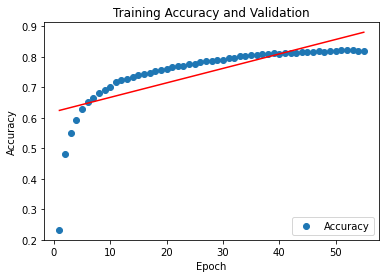

In [37]:
print(len(range(1, len(history.history['loss'])+1)))
print(len(history.history['loss']))
z = np.polyfit(range(1, len(history.history['accuracy'])+1), history.history['accuracy'], 1)
p = np.poly1d(z)
plt.plot(range(1, len(history.history['accuracy'])+1), p(range(1, len(history.history['accuracy'])+1)), "r")
plt.scatter(range(1, len(history.history['accuracy'])+1), history.history['accuracy'],  label='Accuracy')
plt.title('Training Accuracy and Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

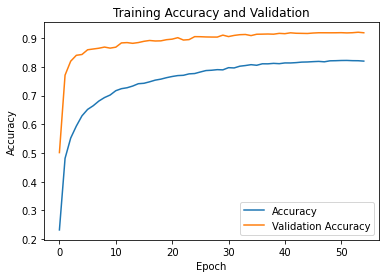

In [38]:
plt.plot(history.history['accuracy'],  label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy and Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

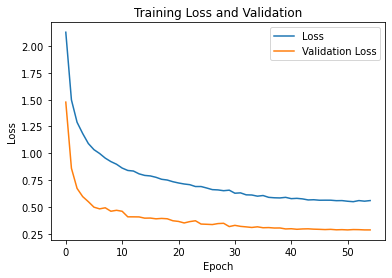

In [13]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss and Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [14]:
test_loss, test_accuracy = model.evaluate(test_imgs, test_lbls, verbose=1)
print('Accuracy: %s, Loss: %s' %(test_accuracy, test_loss))

814/814 [==============================] - 50s 61ms/step - loss: 0.2965 - accuracy: 0.9192
Accuracy: 0.9192147850990295, Loss: 0.29646459221839905


In [15]:
predictions = model.predict_classes(test_imgs)
test_labels = np.argmax(test_lbls, axis=1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<AxesSubplot:>

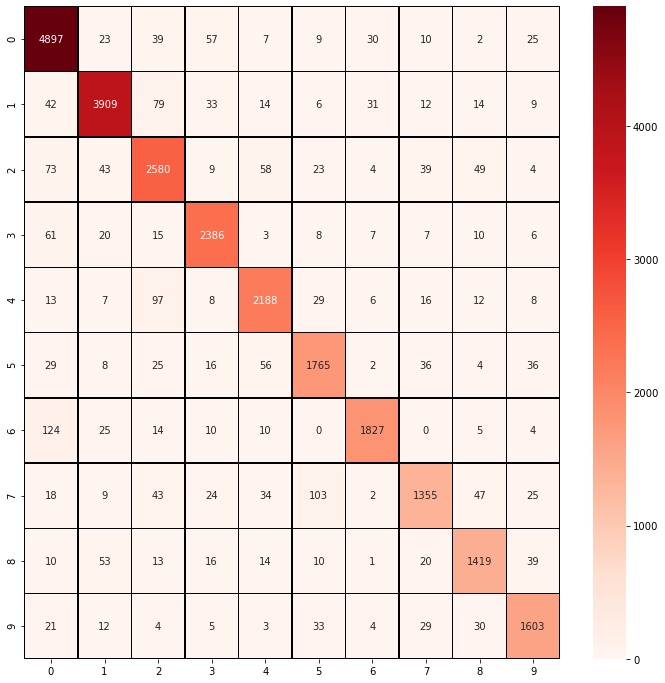

In [16]:
cm = confusion_matrix(test_labels, predictions)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cm, cmap='Reds', linewidth=0.5, linecolor='Black', annot=True, fmt="d")